# Linear Regression

## Notation

$x$ - Input values.\
$x_i$ - ith input value.\
$y$ - Correct output values.\
$\hat{y}$ - Prediction values.\
$y_i$ - ith output value.\
$m$ - Size of training set (i.e. dataset with correct outputs).\
$w, b$ - Model parameters.\
$\alpha$ - Learning rate.

## Formulas

### Model Prediction
$f_{w, b}(x) = wx + b$

### Cost Function

$J(w, b) = \frac{1}{2m} \sum_{i = 1}^{m} (f_{w, b}(x) - y_i)^2$

### Gradient Descent

Repeat the until convergence:

$w = w - \alpha \frac{\partial}{\partial w} = w - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{w, b}(x_i) - y_i)x_i]$\
$b = b - \alpha \frac{\partial}{\partial b} = b - \alpha [\frac{1}{m} \sum_{i = 1}^{m}(f_{w, b}(x_i) - y_i)]$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Linear Regression Implementation

In [2]:
class LinearRegression:
    """
    Linear Regression model.

    Attributes:
        lr (float): Learning rate for gradient descent.
        n_iters (int): Number of iterations for gradient descent.
        weights (numpy.ndarray): Weights of the model.
        bias (float): Bias term of the model.
    """

    def __init__(self, lr=0.001, n_iters=1000):
        """
        Initializes the LinearRegression model with given learning rate and number of iterations.

        Args:
            lr (float, optional): Learning rate. Defaults to 0.001.
            n_iters (int, optional): Number of iterations. Defaults to 1000.
        """
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Trains the LinearRegression model using the given training data.

        Args:
            X (numpy.ndarray): Training data of shape (n_samples, n_features).
            y (numpy.ndarray): Target values of shape (n_samples,).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Apply gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute derivatives
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Predicts the target values using the trained LinearRegression model.

        Args:
            X (numpy.ndarray): Input data of shape (n_samples, n_features).

        Returns:
            numpy.ndarray: Predicted target values of shape (n_samples,).
        """
        return np.dot(X, self.weights) + self.bias


## Generate Random Dataset

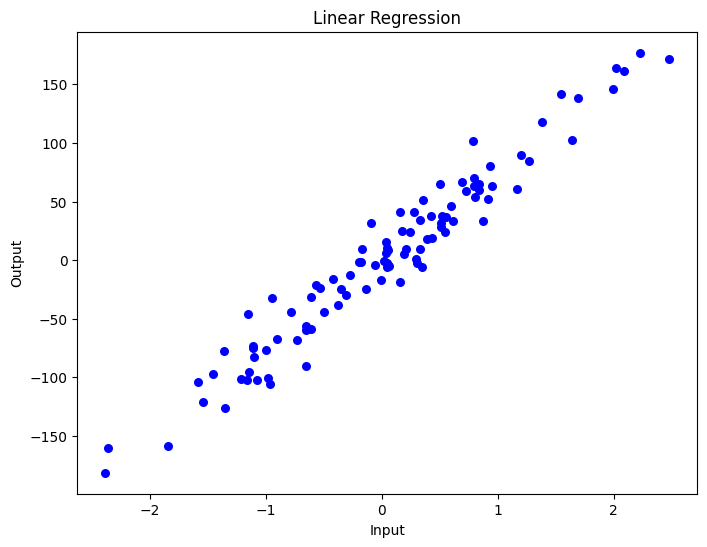

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.title("Linear Regression")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Train Model

In [4]:
def mse(y_true, y_predicted):
    """
    Utility function to calculate the mean squared error cost function.
    """
    return np.mean((y_true - y_predicted) ** 2)


regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mse_value = mse(y_test, predicted)
print(f"The mean squared error is: {mse_value}")


The mean squared error is: 305.7719958301902


## Visualize Results

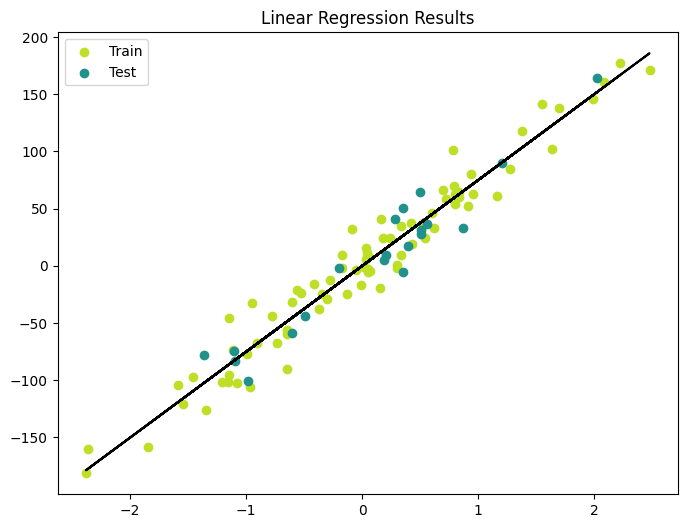

In [5]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), label="Train")
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), label="Test")
plt.title("Linear Regression Results")
plt.legend()
plt.plot(X, y_pred_line, color="black", label="Prediction")
plt.show()

## Train Model with Scikit-Learn

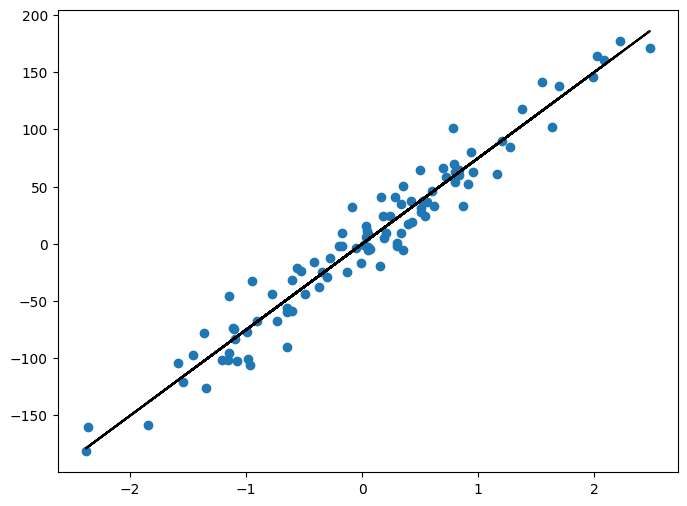

In [6]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, prediction, color="black")
plt.show()